<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/Homework_6_Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/4105/Housing.csv'
housing = pd.read_csv(file_path)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def redefine(x):
    return x.map({'yes': 1, 'no': 0})

In [ ]:
housing[varlist] = housing[varlist].apply(redefine)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
x=housing[['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking']].values
y=housing[['price']].values

In [ ]:
housing=housing[['price','area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'parking']].values

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [ ]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
class HousingNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_nodes=8):
        super(HousingNeuralNetwork, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden_nodes),
            nn.ReLU(),
            nn.Linear(hidden_nodes, 1)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
epochs = 500
learning_rate = 0.001
hidden_nodes = 8

In [ ]:
model = HousingNeuralNetwork(
      input_dim=x_train.shape[1],
      hidden_nodes=hidden_nodes
    )
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
start_time = time.time()

In [ ]:
train_losses = []
for epoch in range(epochs):

    outputs = model(x_train)
    loss = criterion(outputs, y_train)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    train_losses.append(loss.item())


    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

Epoch [0/500], Loss: 25236114243584.0000
Epoch [100/500], Loss: 25231536160768.0000
Epoch [200/500], Loss: 25225953542144.0000
Epoch [300/500], Loss: 25218802253824.0000
Epoch [400/500], Loss: 25209251823616.0000


In [ ]:
training_time = time.time() - start_time

In [ ]:
model.eval()
with torch.no_grad():
    val_predictions = model(x_val)
    val_loss = criterion(val_predictions, y_val)


    val_pred_np = val_predictions.numpy()
    val_true_np = y_val.numpy()


    mse = mean_squared_error(val_true_np, val_pred_np)
    mae = mean_absolute_error(val_true_np, val_pred_np)
    r2 = r2_score(val_true_np, val_pred_np)

print('model', model)
print('training_time', training_time)
print('final_train_loss', train_losses[-1])
print('validation_mse', mse)
print('validation_mae', mae)
print('validation_r2', r2)
print('training_losses', train_losses)

model HousingNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)
training_time 0.590205192565918
final_train_loss 25197283377152.0
validation_mse 30089480000000.0
validation_mae 5003861.5
validation_r2 -4.952925205230713
training_losses [25236114243584.0, 25236070203392.0, 25236026163200.0, 25235982123008.0, 25235938082816.0, 25235894042624.0, 25235847905280.0, 25235803865088.0, 25235757727744.0, 25235715784704.0, 25235671744512.0, 25235625607168.0, 25235583664128.0, 25235535429632.0, 25235491389440.0, 25235447349248.0, 25235405406208.0, 25235359268864.0, 25235317325824.0, 25235269091328.0, 25235225051136.0, 25235181010944.0, 25235134873600.0, 25235090833408.0, 25235046793216.0, 25235000655872.0, 25234956615680.0, 25234910478336.0, 25234868535296.0, 25234822397952.0, 25234780454912.0, 25234732220416.0, 25234688180224.0, 25234642042880.0, 25234598002688.0, 25234

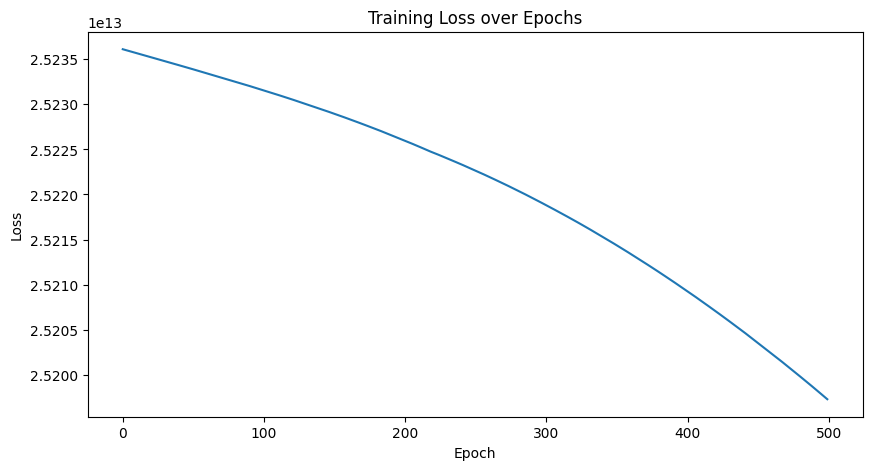

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()